# **Salifort Motors: Employee retention project**

### Goal and description
Salifort Motors is seeking a method to use employee data to gauge what makes them leave the company.

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. 
They have the following question: what’s likely to make the employee leave the company?
If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Step 1. Imports and loading datasets

In [1]:
# Import packages

# data manipulation packages
import numpy as np
import pandas as pd

# data visualization packages
from matplotlib import pyplot as plt
import seaborn as sns

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

HR department has been working in an employee survey that will serve us as our data set to analyze business issue.

In [2]:
# Load dataset into a dataframe
hr_df = pd.read_csv("HR_capstone_dataset.csv")

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Display first few rows of the dataframe
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Step 2. Data Exploration (Initial EDA and data cleaning)

In [3]:
# Gather basic information about the data
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Our data set consists of 10 columns and 14999 rows.
Data types: 
- Floats (2 columns)
- Integers (6 columns)
- Object (strings) (2 columns)

In [4]:
# Gather descriptive statistics about the data
hr_df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


With the descriptive statistics from the data set we can see first data insights. At first we can see some data points that attract our attention as average monthly hours with very high values.

We can also see from the first two steps that some columns have some typos and do not follow a standarize style. It is really important to standarize the writing of the columns as it allows a better readibility and consistency. 

We will correct the typos and standarize the names:

In [5]:
# Display all column names
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
hr_df = hr_df.rename(columns={'last_evaluation':'last_evaluation_score',
                              'Work_accident':'work_accident',
                              'average_montly_hours':'avg_monthly_hrs',
                              'Department':'department',
                              'time_spend_company':'tenure'})


# Display all column names after the update
hr_df.columns

Index(['satisfaction_level', 'last_evaluation_score', 'number_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Check for any missing values in the data is also important as if there are we would need to think on a several options in order to deal with them. 

In [7]:
# Check for missing values
hr_df.isna().sum()

satisfaction_level       0
last_evaluation_score    0
number_project           0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Same for duplicated data

In [8]:
hr_df.duplicated().sum()

3008

In [9]:
# Inspecting duplicates
hr_df_duplicates = hr_df[hr_df.duplicated(keep='first')]


# Check if there are any exact duplicates
if hr_df_duplicates.empty:
    print("No exact duplicates found in the DataFrame.")
else:
    print("There are exact duplicates in the DataFrame.")

    
print()    
hr_df_duplicates.head()

There are exact duplicates in the DataFrame.



,satisfaction_level,last_evaluation_score,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
hr_df.shape

(14999, 10)

Out of 14999 rows, there are 3008 duplicates. This means that 20% of the data is duplicated. 

In this particular case we have to think about the possibility of two rows being equal, in other words, two employees reported the exact same response for every column.
It seems quite difficult so we will proceed to drop the duplicates.

*We have to take into account that data cleaning is a very important process in data modeling.
In this case we are dropping those duplicates as that data may modify our future model and as said, it is pretty difficult that two or more employees submited the same answers to the survey.
Also, in the business side, while doing the analysis and writing conclusions, we could talk to HR deparment and tell them what we encountered.
This data issues may raise from accidental resubmissions by employees (if possible) or technical issues during data collection.
After knowing if we could have new data to add to the dataset or any fix done we could retrain the model to see if we have different results.
It is really important to be aware of how the survey was design and how it can impact the predictions.*

In [11]:
# Drop duplicates and save resulting dataframe in a new variable
hr_df1= hr_df.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
print(hr_df1.shape)
hr_df1.head()

(11991, 10)


,satisfaction_level,last_evaluation_score,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Next step would be checking for outliers. It is also really important as it would serve us to identify possible data entry errors, to understand data distributions and to know if feature engineering is needed.

In [12]:
hr_df1.describe(include='all')

,satisfaction_level,last_evaluation_score,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Looking at the mains stats we can decide whether to look for outliers or not.

Apparently variables that can be analized to see if they have outliers are 'number_project','tenure','avg_monthly_hours'. 
- Number of projects: The maximun number of projects are 7 and the minimun is 2. We do not know the classification of the employees that participated in the survey. A junior level employee can be participating in 2 projects whereas a senior/manager can be participating in 7. We'll take a look deeper look into it.
- Tenure: The maximun number of years is 10 and the minimun 2. It does not seem as unreal numbers when talking about experience but we will take a deeper look into the variable and see if there are outliers.
- Average Monthly Hours: we can see that either maximun and minimun average monthtly hours can be considered as outliers. To be able to say so, we have taken into account a 40h work schedule by week that would lead to 160 hrs per month. Minimun value is 96 hrs a month that can be an outlier comparing it with a full time schedule but we do not know if employees with part time schedule participated in the survey so we will consider it as okay. Maximun value is 310hrs but even the mean and  median are at 200hrs, 40hrs more per month than a usual 9am to 5pm job. As a first look it can be seen as and outliers but we will see if its true or not.

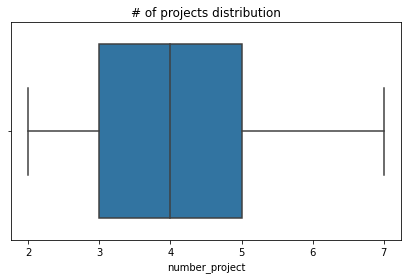

In [13]:
# boxplot to visualize distribution of `number_project` 
plt.figure(figsize=(7,4))
plt.title('# of projects distribution')
plt.xlabel('Avg Hours by month')
sns.boxplot(data=hr_df1, x='number_project')
plt.show()

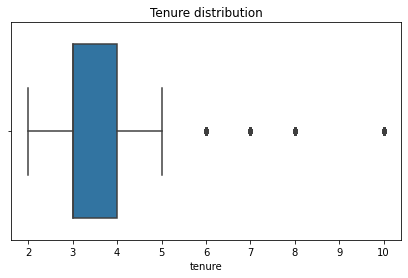

In [14]:
# boxplot to visualize distribution of `tenure` 
plt.figure(figsize=(7,4))
plt.title('Tenure distribution')
plt.xlabel('Avg Hours by month')
sns.boxplot(data=hr_df1, x='tenure')
plt.show()

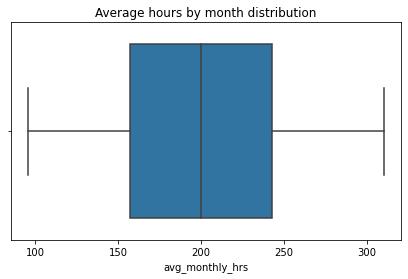

In [15]:
# boxplot to visualize distribution of `avg_month_hrs` 
plt.figure(figsize=(7,4))
plt.title('Average hours by month distribution')
plt.xlabel('Avg Hours by month')
sns.boxplot(data=hr_df1, x='avg_monthly_hrs')
plt.show()

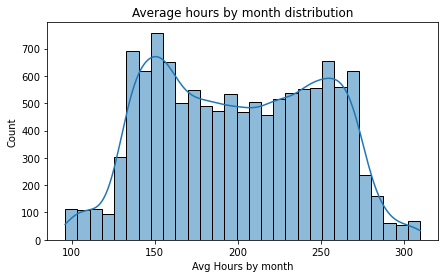

In [16]:
# histplot to visualize distribution of `avg_month_hrs` 
plt.figure(figsize=(7,4))
plt.title('Average hours by month distribution')
plt.xlabel('Avg Hours by month')
sns.histplot(data=hr_df1, x='avg_monthly_hrs', kde=True)
plt.show()

Surprisingly the only variable that has outliers is 'tenure'. We were mostly looking for outliers in 'avg_monthly_hours' but it seems that we have a distribution of the data different than expected. We could also expect to see no outliers when we saw a mean of in average 200 hours per month. 
We can also keep digging into the data for example looking at the mean hours by department, hours by salary or hours by tenure. This may lead to more explanatory insights of why average working hours by month are that high.

With this generic view we have a first look of what could may be an important feature that makes employees decide to leave the company. We will see if this is true when we get the model features importance.


As 'tenure' is the only variable with outliers we will work on them. We are going to set a lower and upper limit based on what should be statistically an outlier (outlier <> (percetiles +/- 1.5 * iqr)).


In [17]:
# quantile 0.25 
percentile_25 = hr_df1['tenure'].quantile(0.25)
print('Percintile 25%: ', percentile_25)
# quantile 0.75 
percentile_75 = hr_df1['tenure'].quantile(0.75)
print('Percintile 75%: ', percentile_75)
# iqr calculation
iqr = percentile_75 - percentile_25
print('IQR: ', iqr)
# lower limit
lower_limit = percentile_25 - 1.5 * iqr
print('Lower limit: ', lower_limit)
# upper limit
upper_limit = percentile_75 + 1.5 * iqr
print('Upper limit: ', upper_limit)
# defining outliers in hr_df1
outliers = hr_df1[(hr_df1['tenure']> upper_limit) | (hr_df1['tenure'] < lower_limit)]

Percintile 25%:  3.0
Percintile 75%:  4.0
IQR:  1.0
Lower limit:  1.5
Upper limit:  5.5


Knowing this values and having identified outliers it would be interesting to see how many of this outliers we do have in the data set.
Pulling how many rows we can see the impact of this outliers.

In [18]:
# pulling outliers rows
print('# of rows with outliers in tenure:', len(outliers))
print()
print(f'% of outliers in tenure against total: {round(len(outliers)/len(hr_df1)*100, 2)}%')

# of rows with outliers in tenure: 824

% of outliers in tenure against total: 6.87%


7% is a relative low qauntity of outliers. We will decide whether to use them as part of the data set or not when choosing what model to build in order to predict employees leaving the company.

Remember that our data set includes employees that already left the company. It would be very interesting to know how the 'left' variable is divided as we want to build a model for present and future employees even if we know that feedback from past employees is helpful.

In [19]:
# Number of people left vs stayed
left_stayed = hr_df1['left'].value_counts()
print(left_stayed)
# Proportion of people who left vs. stayed
left_stayed_proportion = hr_df1['left'].value_counts(normalize=True)
print(round(left_stayed_proportion,2))


0    10000
1     1991
Name: left, dtype: int64
0    0.83
1    0.17
Name: left, dtype: float64


Out of 11991 different employees that participated in the survey, 1991 have left the company. In other words, 83% of the participants are still working in the company.

#### Step 2.1 Data exploration (continue EDA)

#### Data visualizations

Now we are going to create some visualizations in order to see how variables are related between them.
We will mainly focus on number of projects, average monthly hours and tenure.
For each variable we will look at different relationship between them and other variables.
We will examine: 
- Number of projects vs satisfaction level
- Number of projects vs salary
- Number of projects vs average monthly hours
- Number of projects vs left
- Average monthly hours vs deparment
- Average monthly hours vs salary
- Average montly hours vs satisfaction level
- Average monthly hours vs left
- Average monthly hours vs promotions in the last 5 years
- Tenure vs salary
- Tenure vs satisfaction level
- Tenure vs average monthly hours
- Tenure vs left

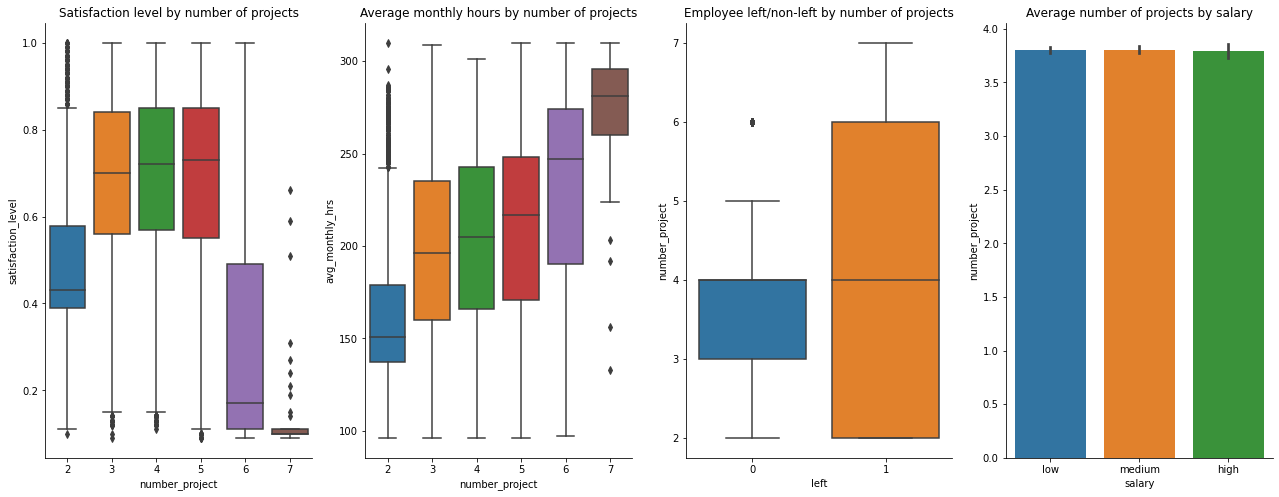

In [20]:
# Number of projects

# set figure and axes
fig, ax = plt.subplots(1, 4, figsize = (22,8))
#plotting the relationship between varaibles.
sns.boxplot(data=hr_df1, x='number_project', y='satisfaction_level', ax=ax[0])
ax[0].set_title('Satisfaction level by number of projects', fontsize='12')
sns.boxplot(data=hr_df1, x='number_project', y='avg_monthly_hrs', ax=ax[1])
ax[1].set_title('Average monthly hours by number of projects', fontsize='12')
sns.boxplot(data=hr_df1, y='number_project', x='left', ax=ax[2])
ax[2].set_title('Employee left/non-left by number of projects', fontsize='12')
sns.barplot(data=hr_df1, x='salary', y='number_project', ax=ax[3])
ax[3].set_title('Average number of projects by salary', fontsize='12')
sns.despine()

After plotting this four relationships between number of projects and other varaibles we have seen some expected and unexpected results.
In the first boxplot, where we compare the satisfaction levels with the number of projects,  we can see that neither the lower or upper ends are desired. Whereas employees with two projects are in a mid satisfaction level, having as outliers employees that are very satisfied, employees with six and seven projects are clearly dissatisfied.
Between three to five projects we can say that employees are satisfied having the group of fives projects the higher median.
This results can be expected also thinking on the number of hours worked each month. (we will see if there is a conection when visualizing average monthly hours and satisfaction levels)

Same as the previous boxplot, the relationship between number of projects and average monthly hours is as expected. We have some outliers in the first and last group that can be analized more in depth but in general we can say that as the number of projects increase, the average monthly hours worked also do.

For the third plot, we can intuit really good information. It seems that people that left the company where the ones having a higher volume of projects. In other words, people that still work in the company are around two to five projects. This, summed up with the satisfaction level from the number of projects could be also an expected result. (We will check if this is true in the upcoming code).

Lastly, we measured the relationship between average number of projects and the salary and we had different results as someone can expect (more projects = more salary). 
We can see that it does not matter the salary, employees get that the average number of projects is the same for each salary type.

In [21]:
# Checking if people that have more projects left
employee_left = print(hr_df1[hr_df1['left']== 1]['left'].value_counts())
print(employee_left)
left_and_six_or_more= hr_df1[(hr_df1['number_project']== 6) | (hr_df1['number_project']== 7)][['left']].value_counts()
print(left_and_six_or_more)
left_and_seven = hr_df1[hr_df1['number_project']== 7][['left']].value_counts()
print(left_and_seven)

1    1991
Name: left, dtype: int64
None
left
1       516
0       455
dtype: int64
left
1       145
dtype: int64


26% of employees that left the company had six or seven projects. 53% of the employees that worked in six or seven projects left the company and 100% of the employees that handled seven projects left the company.


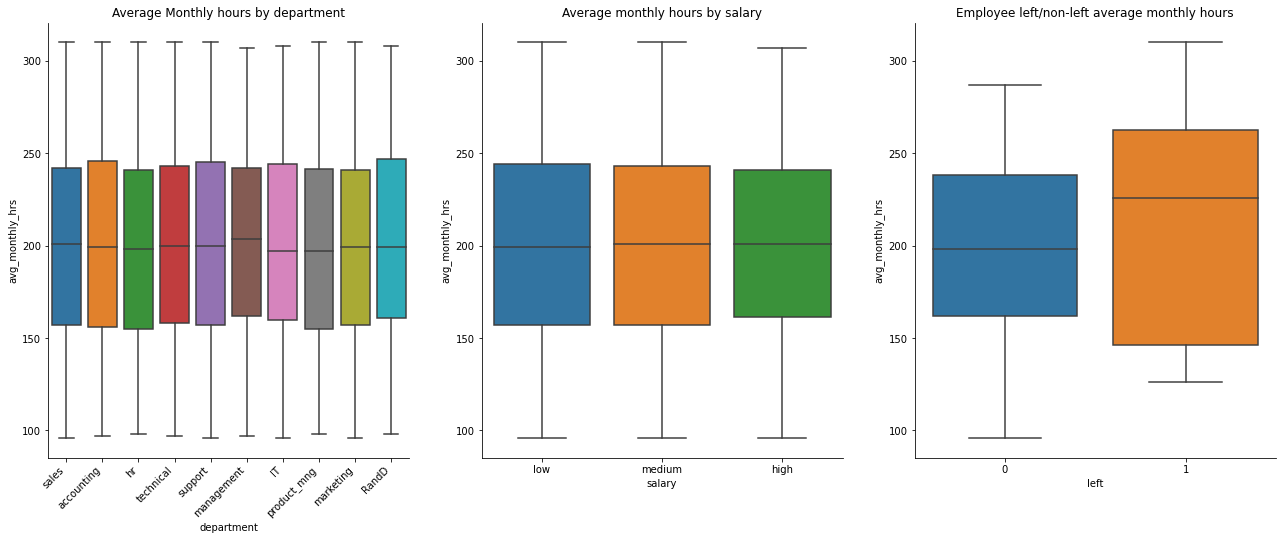

In [22]:
# Average monthly hours - 1

fig, ax = plt.subplots(1, 3, figsize = (22,8))
#plotting the relationship between varaibles.
sns.boxplot(data=hr_df1, x='department', y='avg_monthly_hrs', ax=ax[0])
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_title('Average Monthly hours by department', fontsize='12')
sns.boxplot(data=hr_df1, x='salary', y='avg_monthly_hrs', ax=ax[1])
ax[1].set_title('Average monthly hours by salary', fontsize='12')
sns.boxplot(data=hr_df1, y='avg_monthly_hrs', x='left', ax=ax[2])
ax[2].set_title('Employee left/non-left average monthly hours', fontsize='12')
sns.despine()


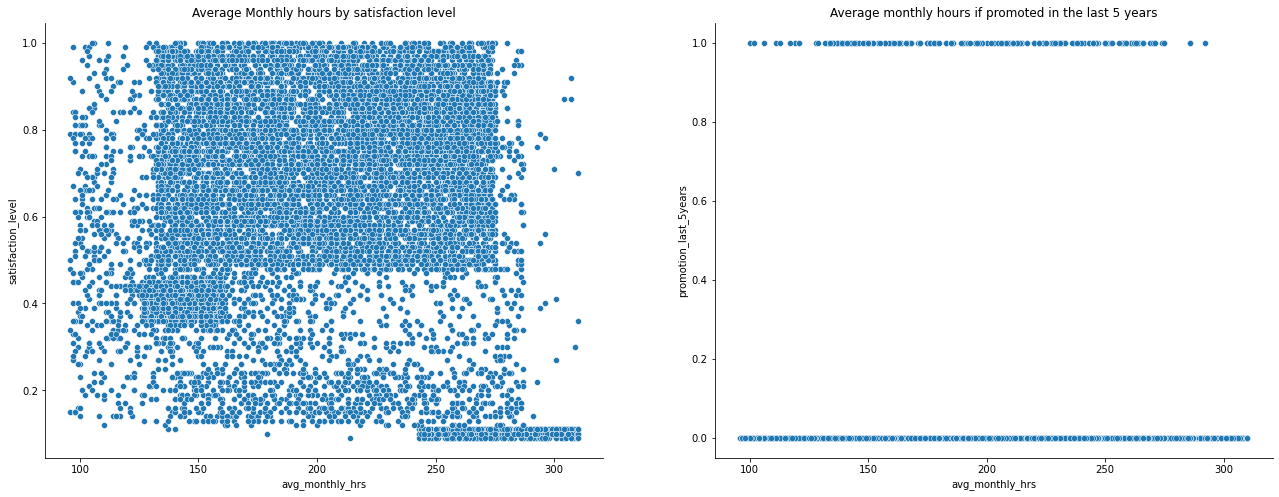

In [23]:
# Average monthly hours - 2

# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))
#plotting the relationship between varaibles.
sns.scatterplot(data=hr_df1, x='avg_monthly_hrs', y='satisfaction_level', ax=ax[0])
ax[0].set_title('Average Monthly hours by satisfaction level', fontsize='12')
sns.scatterplot(data=hr_df1, x='avg_monthly_hrs', y='promotion_last_5years', ax=ax[1])
ax[1].set_title('Average monthly hours if promoted in the last 5 years', fontsize='12')
sns.despine()

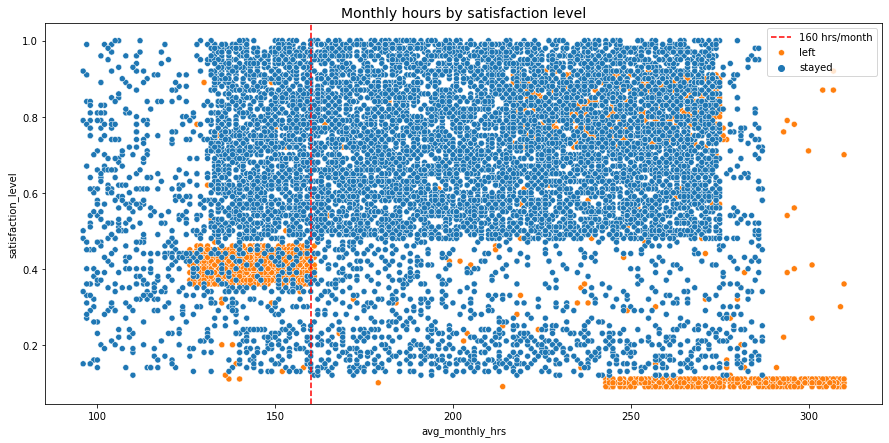

In [24]:
# Average monthly hours - 2.1

#plotting average monthly hours vs satisfaction level with left as color
plt.figure(figsize=(15,7))
sns.scatterplot(data=hr_df1, x='avg_monthly_hrs', y='satisfaction_level', hue='left')
plt.title('Monthly hours by satisfaction level', fontsize='14');
plt.axvline(x=160, color='red', label='160 hrs/month', ls='--')
plt.legend(labels=['160 hrs/month', 'left', 'stayed'])
plt.show()

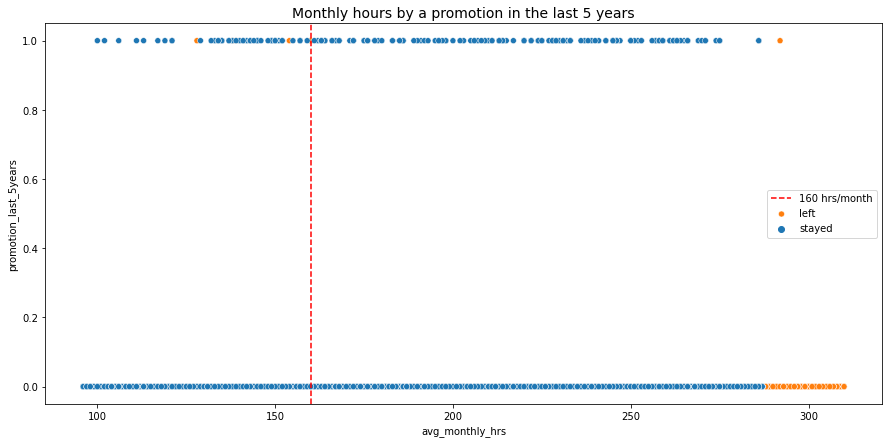

In [25]:
# Average monthly hours - 2.2

#plotting average monthly hours vs promotion in the last 5 years with left as color
plt.figure(figsize=(15,7))
sns.scatterplot(data=hr_df1, x='avg_monthly_hrs', y='promotion_last_5years', hue='left')
plt.title('Monthly hours by a promotion in the last 5 years', fontsize='14');
plt.axvline(x=160, color='red', label='160 hrs/month', ls='--')
plt.legend(labels=['160 hrs/month', 'left', 'stayed'])
plt.show()

Average monthly hours is a very interesting parameter to study. 

Looking at the first visualizations, there is hardly any difference between departments or salary types. The median is around 200 hours for both relationships.

There is difference between average monthly hours worked by employees that left the company than the ones that stayed but we already saw that type of relationship with the number of projects, so it would be normal to be able to say that the higher the number of projects the higher the working hours hence higher the employment churn rate.

Then we plotted average monthly hours and satifaction level plus average monthly hours and whether the employee was promoted or not in the last 5 years.

In the first scatterplot we can clearly see three main groups. The larger rectangle can be normal thinking of what we have seen already but there are other two that we wanted to study.
Going more in depth for those two groups and seeing the two rectangles and their position we thought that there was a possibility of people resigning or being let go so we decided to plot the scatterplot with the 'left' variable.

For the rectangle that is positioned in a very low satisfaction score and very high amount of working hours we can see that all of them left the company, something normal when employees are investing a lot of hours at work and are dissatisfied with it.

The other rectangle(around 0.4 satisfaction and less than 160 hours per month) made us think about people that were let go due to lack of work but they were also not totally satisfied with the company so we won't make assumptions here.

For the relationship between working hours per month and promotions we saw that there are much less people that were promoted than those who were not. This can be related to tenure. Remember that the median from tenure was from 3 to 4 years.

Lastly, seeing the pattern in the right lower rectangle of the working hours and satisfaction level scatterplot we thought about a possible conection with the 'left' variable in the promotions relationship. Also knowing from previous study in the number of projects variable where 100% of those who had 7 projects left the company.  

There is a clear view of past employees that left the company without being promoted after investing a huge amount of hours per month.

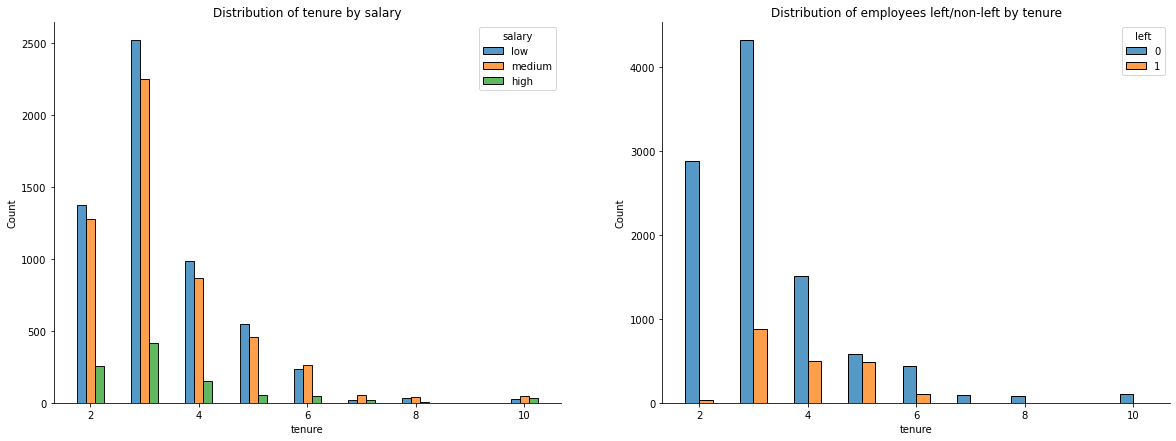

In [26]:
# Tenure - 1

fig, ax = plt.subplots(1, 2, figsize = (20,7))
#plotting the relationship between varaibles.
sns.histplot(data=hr_df1, x='tenure', hue='salary',multiple='dodge',discrete=1,shrink=0.5, ax=ax[0])
ax[0].set_title('Distribution of tenure by salary', fontsize='12')
sns.histplot(data=hr_df1, x='tenure', hue='left',multiple='dodge',discrete=1,shrink=0.5, ax=ax[1])
ax[1].set_title('Distribution of employees left/non-left by tenure', fontsize='12')
sns.despine()

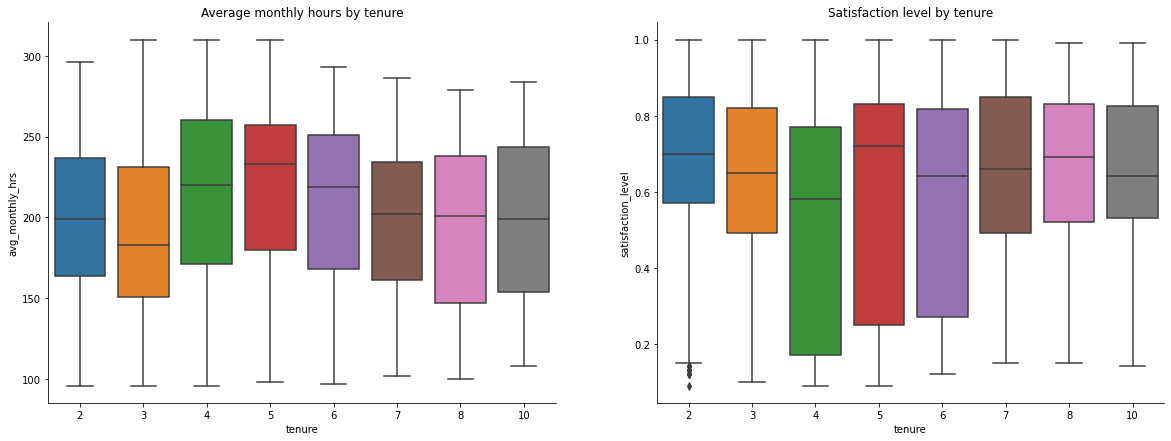

In [27]:
# Tenure - 2

fig, ax = plt.subplots(1, 2, figsize = (20,7))
#plotting the relationship between varaibles.
sns.boxplot(data=hr_df1, x='tenure', y='avg_monthly_hrs', ax=ax[0])
ax[0].set_title('Average monthly hours by tenure', fontsize='12')
sns.boxplot(data=hr_df1, x='tenure', y='satisfaction_level', ax=ax[1])
ax[1].set_title('Satisfaction level by tenure', fontsize='12')
sns.despine()

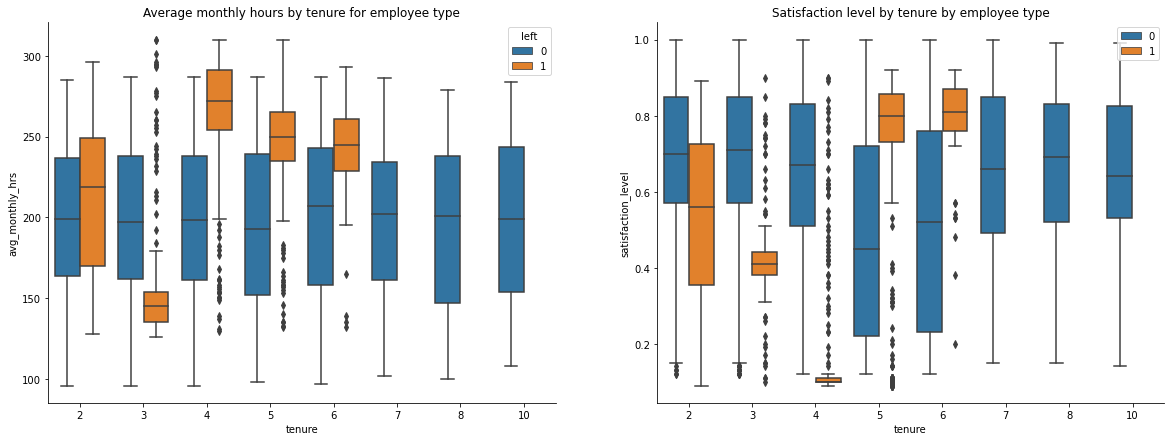

In [28]:
# Tenure - 2.1

fig, ax = plt.subplots(1, 2, figsize = (20,7))
#plotting the relationship between varaibles.
sns.boxplot(data=hr_df1, x='tenure', y='avg_monthly_hrs', hue='left', ax=ax[0])
ax[0].set_title('Average monthly hours by tenure for employee type', fontsize='12')
sns.boxplot(data=hr_df1, x='tenure', y='satisfaction_level', hue='left', ax=ax[1])
ax[1].set_title('Satisfaction level by tenure by employee type', fontsize='12')
plt.legend(loc='upper right')
sns.despine()


As last main feature to study we selected tenure as we saw that the median tenure was around 3.5 years and HR was looking for any reason of a high employment churn rate.

First we looked at tenure vs salary as usually we expect higher salaries as employees gain experience and add value to the company. It is really interesting there are few employees that have a high salary but furthermore, the majority of the ones that have a high salary have low tenure. Even that still being in the company more than 4 years is difficult as data showed, those employees how still work for the company for at least 4 years do not have a better salary. Then we can see that most salaries are divided into low and medium.

As next step we wanted to try to build a conection between employees who left the company and tenure and even there balance between left or non-left employees is not the best, we can clearly see that people begin to leave the company after 3 years.

The next two plots gave a summary view of the situation all around the company. In the first one, we can see that no matter the tenure you have, the average monthly hours are more or less the same. We may say that from year three to four, employees increase their working hours. May be those who decide to stay have to do the work from the ones who left or may be they want to see if making a little more effort will pay off with a promotion. Nothing here is known, just thinking about odds.

For tenure and satisfaction level years four, five and six have a higher iqr value, meaning that the employees are more distributed in different satisfaction levels.

Lastly we wanted to see how does left variable interacts in this two visualizations so we made the same plots but this time splitting between left and non-left. 

It is really curious to see that whereas year 3 is the year where most of the employees decide to leave the company, when talking about average working hours, even that there are outliers, most of those employees worked really low amount of hours in comparison with the group that stayed in the company. 

However the next three years, it drastically changes and people who decided to stay and then left the company where the ones that worked tons of hours. 

Satisfaction level and tenure with left variable splitting the employees is a little bit more difficult to interpret as those who left have very different opinions, many of them with radical thoughts, as for example year 4 median being really low around 0 points of satisfaction but we have outliers in satisfaction around 0.85.

### Conclusions / Propositions

After looking to all the variables and their relationships we have concluded that: 
- The number of projects is correlated to lower satisfaction.
- The number of projects is correlated to higher amount of working hours per month.
- There is a high rate of overwork. (median around 200hrs)
- Salary is independent from working hours and tenure
- Average monthly working hours is correlated to people leaving the company
- Promotions do not depend of how much hours the employees invested in their work.

In order to improve the unemployment rate and with the information we have gather till now we suggest:
- A better organization of projects
- Pay overtime if it is not paid
- Build a structure that reflects salary around value added and tenure.
- Build a better promotion platform so employees are more engage with their career inside the company.
- Build a platform to try to engage more the employees as most of them have from two to three year of tenure but we know that year three is where employees decide to leave.

Now we are going to check for strong correlations between variables in the data.

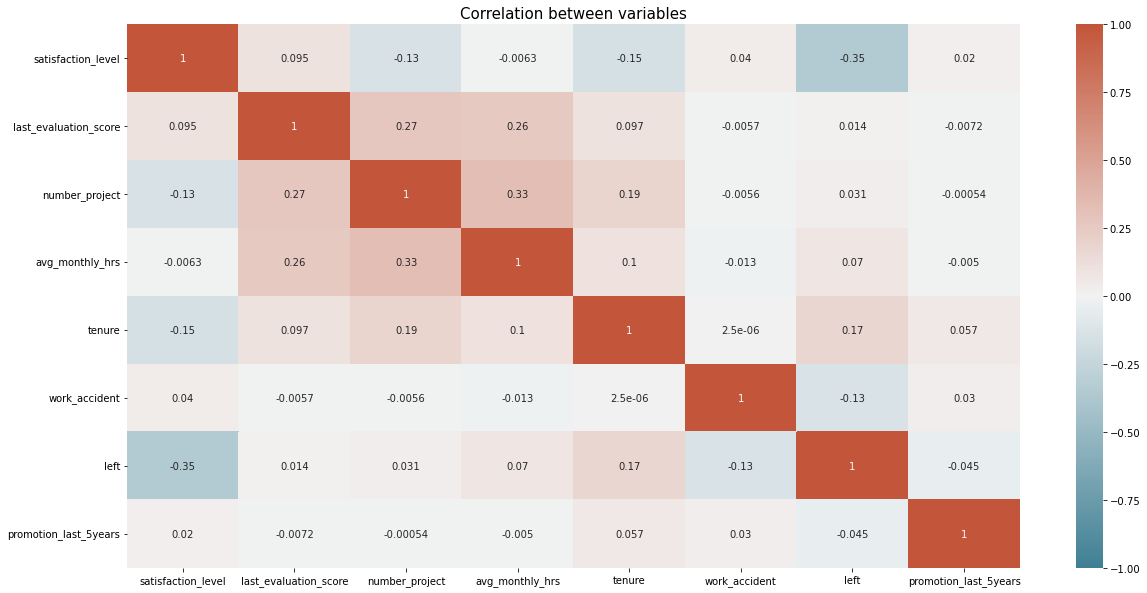

In [29]:
corr = hr_df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation between variables', fontsize=15)
plt.show()

Heatmap show that the most postive correlated parameters are 'avg_monthly_hrs' and 'number_projects' whereas 'satisfaction_score' and 'left' are the most negative correlated parameters.

### Step 3. Model building

After cleaning, structuring and studying the data set now it's time to build a model that predicts if employees would leave the company.
The prediction that we want to make is categorical so we will need to classify our data. 
In order to do this we have different options. In our case we will build a logistic regression and a random forest.

We choose to build this two different approaches in order to see what is the difference and which of them fits better the prediction.

#### Approach A:
##### Logistic Regression

First thing we have to work on is in categorical data. In our data set we just have two categorical features aside from the one we want to predict. These are 'department' and 'salary'.
We have to treat this two variables differently as salary has a heirarchy, we need fixed numbers for each category. In the case of department we just need the categories to be transformed into numbers.

As we will build two models we are going to create a copy of the one worked until now so we can perfectly identify each model and part of the analisys.

In [30]:
# making a copy of hr_df1 for logistic regression
log_hr_df = hr_df1.copy()

In [31]:
# encoding 'salary' variable
int_cats = {'low': 0, 'medium': 1, 'high': 2}
log_hr_df['salary'] = log_hr_df['salary'].replace(int_cats)

# making sure changes are done
log_hr_df['salary'].unique()

array([0, 1, 2])

In [32]:
log_hr_df['salary'].dtypes

dtype('int64')

In [33]:
# encoding 'department' variable
log_hr_df = pd.get_dummies(log_hr_df, drop_first= False)
# making sure changes are done
log_hr_df.head()

,satisfaction_level,last_evaluation_score,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


If we remember, at the inital part of the analisys we saw that 'tenure' had outliers. As logistic regresions are quite sensitive to outliers we will just select the data inside the outliers.

In [34]:
# dropping 'tenure' outliers from data set
# We use upper_limit and lower_limit calculated previously.
log_hr_df = log_hr_df[(log_hr_df['tenure'] >= lower_limit) & (log_hr_df['tenure'] <= upper_limit)]
# making sure changes were done
log_hr_df[log_hr_df['tenure']>= upper_limit].sum().sum()

0.0

Now we have to isolate the outcome variable and select the features that we want to add to the model

In [35]:
# Isolating the outcome
y = log_hr_df['left']

# Selecting features to use in the model
X = log_hr_df.drop('left', axis=1)

Next, we will split the data into train and test. We will use a usual train/test split with a 80/20.

In [36]:
# train - test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=42) # We use stratify as 'y' class is really unbalance and random_state = 42 so we can reproduce the same results if wanted.

After splitting the data we have to build the logistic regresion

In [37]:
# building the model
lr_model = LogisticRegression(random_state=42, max_iter=500)
# fitting the model
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Next step after building and fitting the model is testing it.

In [38]:
# testing y to predict 
y_preds = lr_model.predict(X_test)

Now we will create a confusion matrix in order to see the results of the logistic regression model.

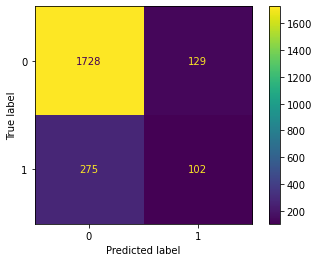

In [39]:
# Confusion matrix creation
cm = confusion_matrix(y_test, y_preds, labels=lr_model.classes_)

# Creating the visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_model.classes_ )
disp.plot(values_format='')
plt.show()

From the confusion matrix we can see that the model is more sensitive on predicting False Positives, it has a higher tendency in misclassifying  negative instances as positive. In other words it will identify people as leaving the company when they did not really leave.

Lastly we will create a classification report where we will see how the model is doing. In this particular case if we recall in how balanced the class was we would remenber that it was around 83% to 17%. This indicates that we have an unbalance class but not that much that would make us resample the data.

In [40]:
# We call variable 'left_stayed_proportion' to see class balance
left_stayed_proportion

0    0.833959
1    0.166041
Name: left, dtype: float64

In [41]:
# we create the classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_preds, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      1857
    Predicted would leave       0.44      0.27      0.34       377

                 accuracy                           0.82      2234
                macro avg       0.65      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234



In the classification report we see four different metrics. Accuracy, precision, recall and f1-score. With this metrics we are able to interpret and see how good the model is. 
- Accuracy represents how is the model doing when predicting correctly. Good performance --> 82%
- Precision represents how much of the positives the model predictied correctly. Good performance --> 79%
- Recall represents how much positives the model predicted correctly from all the actual positives. Good performance --> 82%
- F1-score represents an average of how the model did in precision and recall. Good performance --> 80%

However, the company is interested in predicting how the model predicts people leaving the company. If instead of looking at weighted average, we look at 'Predicted would leave', the model is not the best possible.

#### Approach B
##### Random Forest

For Random Forest model we will use hr_df1 as random forest hanldes good outliers.

In [42]:
# Encode data ('salary' and 'departments')
# We use int_cats variable created for logistic regresion
hr_df1['salary'] = hr_df1['salary'].replace(int_cats)
hr_df1 = pd.get_dummies(hr_df1, drop_first= False)

#making sure changes are done
hr_df1.head()

,satisfaction_level,last_evaluation_score,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
# Set oucome varaible
y = hr_df1['left']

In [44]:
# Set feautres
X = hr_df1.drop('left', axis=1)

In [45]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [46]:
# Create the model 
rf = RandomForestClassifier(random_state=42)

In [47]:
# Assign hyperparameters
cv_params = {'max_depth':[3,5,None] ,
            'n_estimators': [250,500],
            'max_features': [1.0], 
            'min_samples_leaf':[1,2,3] , 
            'min_samples_split':[2,3,4],
            'max_samples':[0.7,1.0]}

In [48]:
# Assigning scores to caputes
scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}

In [49]:
# Instantiating GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [50]:
%%time
#fitting the model
rf1.fit(X_train, y_train)

CPU times: user 10min 58s, sys: 0 ns, total: 10min 58s
Wall time: 11min 2s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [51]:
# Check best AUC score on CV
rf1.best_score_

0.9811081894824805

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Now we will identify the best values for the model parameters.

In [52]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

We also want to see the result from all the scores from grid search. We will name the function 'make results' and the aim of it is to create a dataframe with the best mean metric scores from all the results.

In [53]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table


In [54]:
make_results('Randon Forest Approach', rf1, 'auc')

,model,precision,recall,F1,accuracy,auc
0,Randon Forest Approach,0.981054,0.906457,0.942244,0.981547,0.981108


Next we will evaluate the model in the test set.

In [55]:
# making predictions on the test data using the best model
y_pred = rf1.best_estimator_.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [56]:
# Calculating all the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


# Print the best scores on the test data
print("Test Set Results (Best Model):", rf1.best_estimator_ )
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")



Test Set Results (Best Model): RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy: 0.9862
Precision: 0.9893
Recall: 0.9271
F1-score: 0.9572
AUC-ROC: 0.9626


The test scores are very similar to the validation scores, which is good. It appears to be a strong model.

Lets build a confusion matrix and visualize the results.

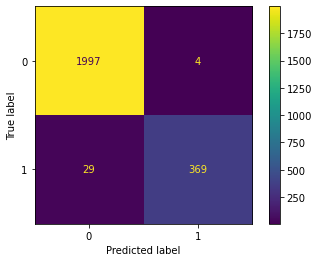

In [57]:
# Creating the confussion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf1.classes_ )

# Creating the visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf1.classes_ )
disp.plot(values_format='')
plt.show()

We can see that the model is performing really well. It tends to predict some more False positives (Type I Error) than False Negatives, meaning the model predicts as true something thats false.
In our case, the model is really robust predicting employees that will leave the company. It will slightly predict more people leaving the company that the ones that are really leaving with that False positive sensitiveness. We prefer this type of error as it will HR department do a better effort when thinking and implementing changes. Is better to consider a employee as left that thinking they won't leave and finally they leave.

To finish we will look at the feature importances.

In [58]:
# Get feauture importances
feat_imp = rf1.best_estimator_.feature_importances_

In [59]:
# Get indices of top 10 features
ind = np.argpartition(feat_imp, -10)

In [60]:
# Get column labels of top 10 features 
feat = X.columns[ind]

In [61]:
# Filter `feat_impt` to consist of top 10 feature importances
feat_imp = feat_imp[ind]

In [62]:
# Get feauture importances
feat_imp = rf1.best_estimator_.feature_importances_
# Get indices of top 10 features
ind = np.argpartition(feat_imp, -10)
# Get column labels of top 10 features 
feat = X.columns[ind]
# Filter `feat_impt` to consist of top 10 feature importances
feat_imp = feat_imp[ind]

In [63]:
# create the dataframe to plot
y_df = pd.DataFrame({'Feature':feat,'Importance':feat_imp})
y_sort_df = y_df.sort_values('Importance', ascending=False)
y_sort_df_top10 = y_sort_df.iloc[0:10]
y_sort_df_top10

,Feature,Importance
17,satisfaction_level,0.450897
16,number_project,0.166695
11,last_evaluation_score,0.160062
13,tenure,0.123428
14,avg_monthly_hrs,0.089230
12,salary,0.002986
15,department_sales,0.001494
10,department_technical,0.001310
9,department_support,0.000907
8,department_IT,0.000576


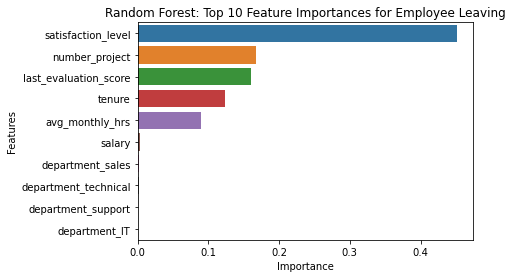

In [64]:
sns.barplot(data=y_sort_df_top10, x='Importance', y='Feature')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest: Top 10 Feature Importances for Employee Leaving')
plt.show()

### Step 4. Conclusion, Recommendations, Next Steps

##### Logistic Regresion
The logistic regression model achieved 82% accuracy, 79% precision, 82% recall and 80% f1 score.(all weighted averages)

##### Random Forest
The random forest model achieved 98% accuracy, 98% precision, 90% recall, 94%  f1 score and 98% AUC curve.

As we can see random forest is a better approach for the bussiness problem we are trying to solve.

The model and the feature importances extracted from the model confirm that employees at the company are overworked, their satisfaction level is really impactul in their decision and the number of projects and last evaluation score are key features for their decision.

To retain employees, the following recommendations could be presented to the stakeholders:

- Cap the number of projects that employees can work on.
- Consider promoting employees who have been with the company for at least three years as that's the point where employees begin  to leave the company.
- Either reward employees for working longer hours, or don't require them to do so.
- Invest time in giving paying policies information so employees become familiar with the company's overtime pay policies.
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
- Redesign employee evaluation so all employees are rewarded based on their effort. 